<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Шаг-1.-Откроем-файл-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Откроем файл с данными и изучим общую информацию</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-наименований-колонок" data-toc-modified-id="Обработка-наименований-колонок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка наименований колонок</a></span></li><li><span><a href="#Обработка-пропусков-" data-toc-modified-id="Обработка-пропусков--2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков <a id="empty" rel="nofollow"></a></a></span></li><li><span><a href="#Замена-типа-данных-" data-toc-modified-id="Замена-типа-данных--2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных <a id="error_type" rel="nofollow"></a></a></span></li><li><span><a href="#Обработка-ошибок-в-значениях-" data-toc-modified-id="Обработка-ошибок-в-значениях--2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка ошибок в значениях <a id="error_value" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Столбец-'children'" data-toc-modified-id="Столбец-'children'-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Столбец 'children'</a></span></li><li><span><a href="#Столбец-'dob_years'" data-toc-modified-id="Столбец-'dob_years'-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Столбец 'dob_years'</a></span></li><li><span><a href="#Столбец-'education'" data-toc-modified-id="Столбец-'education'-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Столбец 'education'</a></span></li><li><span><a href="#Столбец-'gender'" data-toc-modified-id="Столбец-'gender'-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Столбец 'gender'</a></span></li><li><span><a href="#Столбец-'income_type'" data-toc-modified-id="Столбец-'income_type'-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Столбец 'income_type'</a></span></li></ul></li><li><span><a href="#Обработка-дубликатов-" data-toc-modified-id="Обработка-дубликатов--2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка дубликатов <a id="duplicate" rel="nofollow"></a></a></span></li><li><span><a href="#Лемматизация-" data-toc-modified-id="Лемматизация--2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Лемматизация <a id="lemmas" rel="nofollow"></a></a></span></li><li><span><a href="#Категоризация-данных-" data-toc-modified-id="Категоризация-данных--2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Категоризация данных <a id="categories" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Добавление-категорий" data-toc-modified-id="Добавление-категорий-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Добавление категорий</a></span></li><li><span><a href="#СЛОВАРИ-КАТЕГОРИЙ:" data-toc-modified-id="СЛОВАРИ-КАТЕГОРИЙ:-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>СЛОВАРИ КАТЕГОРИЙ:</a></span></li></ul></li></ul></li><li><span><a href="#Шаг-3.-Ответы-на-вопросы" data-toc-modified-id="Шаг-3.-Ответы-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Ответы на вопросы</a></span></li><li><span><a href="#Шаг-4.-Общий-вывод" data-toc-modified-id="Шаг-4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Общий вывод</a></span></li></ul></div>

# Исследование надёжности заёмщиков — анализ банковских данных

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования:** определить зависимость факта погашения кредита в срок от таких факторов: наличие детей, семейное положение, уровень дохода, цель кредита.

## Шаг 1. Откроем файл с данными и изучим общую информацию

Блок загрузки всех необходимых модулей, используемых в работе, расположим в самом начале.

In [18]:
# === МОДУЛИ ===:

import pandas as pd
import numpy as np
from pymystem3 import Mystem
from collections import Counter
from json import dumps
import seaborn as sb

In [10]:
# === ФУНКЦИИ ===
        
# ФУНКЦИЯ вывода минимального, максимального значений
def print_edges(data_frame, name=''):
    print('-'*50)
    if name == '':
        print('Диапазон значений:')
    else:
        print(name+':')
    print('Максимальное значение:', data_frame.max() )
    print('Минимальное значение:', data_frame.min() )
    print('-'*50)

Прочитаем файл `data.csv` из папки `/datasets` и сохраним его в переменной `df`:

In [11]:
# Чтение данных:
df = pd.read_csv('/datasets/data.csv')

Согласно описанию данных в таблице имеются следующие колонки:
* **children** — количество детей в семье
* **days_employed** — общий трудовой стаж в днях
* **dob_years** — возраст клиента в годах
* **education** — уровень образования клиента
* **education_id** — идентификатор уровня образования
* **family_status** — семейное положение
* **family_status_id** — идентификатор семейного положения
* **gender** — пол клиента
* **income_type** — тип занятости
* **debt** — имел ли задолженность по возврату кредитов
* **total_income** — ежемесячный доход
* **purpose** — цель получения кредита

In [12]:
# Проверим наименовние колонок в загруженной таблице:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [13]:
# Просмотр общей информации:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [14]:
# Просмотр общей информации:
display(df.head(7))
df.nunique()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем


children                8
days_employed       19351
dob_years              58
education              15
education_id            5
family_status           5
family_status_id        5
gender                  3
income_type             8
debt                    2
total_income        19351
purpose                38
dtype: int64

**Вывод** <a id="review"></a>

В каждой строке таблицы данные о клиенте банка и его кредите.

Данные в столбцах делятся на несколько типов информации:

* персональная информация о клиенте банка, это - возраст, пол, семейное положение, количество детей;
* профессиональную информацию о клиенте - уровень образования, трудовой стаж, тип занятости, уровень дохода;
* информаци непосредственно о кредите клиента (задолженность, цель кредита).

Основные моменты предобработки данных:

1. Наименовния колонок ***соответствуют*** общепринятым правилам
1. Пропуски значений:
    * **days_employed** — общий трудовой стаж в днях
    * **total_income** — ежемесячный доход
1. Ошибки типов данных:
    * **days_employed** — общий трудовой стаж в днях
    * **total_income** — ежемесячный доход
1. Ошибки в значениях:
    * **children** — количество детей в семье (проверить значения)
    * **dob_years** — возраст клиента в годах (проверить диапазон)
    * **education** — уровень образования клиента (не соответсвует количеству уникальных **education_id**)
    * **gender** — пол клиента (3 уникальных - это много)
    * **income_type** — тип занятости (проверить значения)
1. Дубликаты: ***требуется*** проверка, поиск дубликатов
1. Возможная категоризация данных:
    * **children** — количество детей в семье
    * **dob_years** — возраст клиента в годах
    * **education** (**education_id**) — уровень образования клиента
    * **family_status** (**family_status_id**) — семейное положение
    * **income_type** — тип занятости
    * **total_income** — ежемесячный доход
    * **purpose** — цель получения кредита

## Шаг 2. Предобработка данных

### Обработка наименований колонок

Наименования колонок таблицы не требуют исправлений

### Обработка пропусков <a id="empty"></a>

In [28]:
# Проверим наличие пропусков:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Число пропусков по трудовому стажу и ежемесячному доходу совпадает.

Причинами появления пропусков по трудовому стажу и ежемесячному доходу может быть отказ клиента сообщать банку данные о трудовой деятельности.

Заполним значения трудового стажа и ежемесячного дохода по средним значениям соответствующих типов занятости:
1. Определим средние значения трудового стажа и ежемесячного дохода для какждого типа занятости
1. Выделим список всех типов занятости для пропущенных значений
1. Пройдем по списку типов занятости для пропущенных значений и присвоим соответсвующее среднее значение трудового стажа и дохода

In [8]:
df.groupby('income_type').agg({'total_income': ['min', 'mean', 'median', 'max']})

total_income                                            
                           min           mean         median           max
income_type                                                               
безработный       59956.991984  131339.751676  131339.751676  2.027225e+05
в декрете         53829.130729   53829.130729   53829.130729  5.382913e+04
госслужащий       29200.077193  170898.309923  150447.935283  9.104515e+05
компаньон         28702.812889  202417.461462  172357.950966  2.265604e+06
пенсионер         20667.263793  137127.465690  118514.486412  7.351033e+05
предприниматель  499163.144947  499163.144947  499163.144947  4.991631e+05
сотрудник         21367.648356  161380.260488  142594.396847  1.726276e+06
студент           98201.625314   98201.625314   98201.625314  9.820163e+04

In [9]:
# Таблица средних значений трудового стажа для каждого типа занятости:
days_employed_mean = df.groupby('income_type')['days_employed'].mean()
# Таблица средних значений ежемесячного дохода для каждого типа занятости:
total_income_mean = df.groupby('income_type')['total_income'].mean()
# Список типов занятости для пропущенных значений:
list_income_type_na = list(df[df['days_employed'].isna()]['income_type'].unique())

# Для списка типа занятости в пропущенных значениях присвоим средние значения стажа и дохода соответсвующих типов занатости:
for val in list_income_type_na:
    df.loc[(df['days_employed'].isna()) & (df['income_type'] == val), 'days_employed'] = days_employed_mean[val]
    df.loc[(df['total_income'].isna()) & (df['income_type'] == val), 'total_income'] = total_income_mean[val]

# Перепроверим количество пропущенных значений:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

Пропущенные значения трудового стажа и ежемесячного дохода были заменены на средние значения трудового стажа и ежемесячного дохода для соответствующих типов занатости.

### Замена типа данных <a id="error_type"></a>

In [10]:
#Проверим диапазон значений для трудового стажа:
print_edges(df['days_employed'], 'Трудовой стаж')

--------------------------------------------------
Трудовой стаж:
Максимальное значение: 401755.40047533
Минимальное значение: -18388.949900568383
--------------------------------------------------


Попробуем поделить данные значения на примерное чило дней в году (примем 365):

In [11]:
print('Число лет для максимального положительного значения: {:.2f}'.format(df['days_employed'].max() / 365))
print('Число лет для минимального отрицательного значения: {:.2f}'.format(df['days_employed'].min() / 365))

Число лет для максимального положительного значения: 1100.70
Число лет для минимального отрицательного значения: -50.38


Положимтельные значения слишком большие. Отрицательные значения походят на число дней стажа, взятые со знаком `-`.

Проверим есть ли зависимость отрицательных и положительных значений от типа занятости:
<a id="anchor_1"></a>

In [12]:
#Проверим к какому типу занятости относятся положительные значения:
print('Отрицательные значения дней стажа:')
negative_days_employed = df[df['days_employed'] < 0].copy()
display( negative_days_employed['income_type'].value_counts() )
print('Положительные значения дней стажа:')

#positive_days_employed = df[df['days_employed'] > 0]    >>> Старый вариант вызывающий Warning в In[15]

positive_days_employed = df[df['days_employed'] > 0].copy()   # Новый вариант

display( positive_days_employed['income_type'].value_counts() )

Отрицательные значения дней стажа:


сотрудник          11119
компаньон           5085
госслужащий         1459
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Положительные значения дней стажа:


пенсионер      3856
безработный       2
Name: income_type, dtype: int64

Таким образом положительные значения относятся к неработающим людям.

Проверим визуальное распределение значений трудового стажа в зависимости от возраста (отдельно для отрицательных и положительных значений:

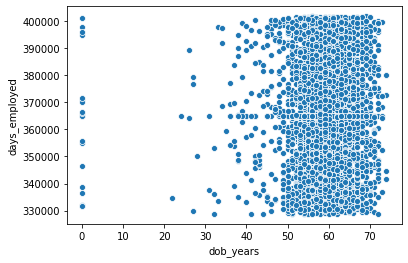

In [13]:
sb.scatterplot(data=positive_days_employed, x='dob_years', y='days_employed')

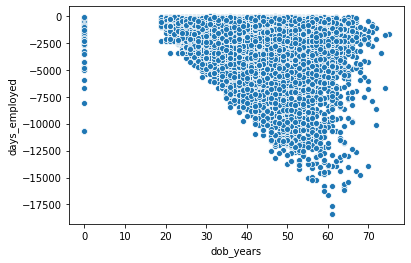

In [14]:
sb.scatterplot(data=negative_days_employed, x='dob_years', y='days_employed')

Нулевые значения возраста - это веротнее всего пропуски значений (их не рассматриваем).

Отрицательные значения распределяются линейно в соответствии с возрастом клиента, не превышая его возраст. Это походит на накопленный трудовой стаж.

Положиетльные значения распределены в хаотичном порядке, независимо от возраста и строго в в определенных границах. Выведем значения этих границ.

In [15]:
max_positive_days_employed = positive_days_employed['days_employed'].max()
min_positive_days_employed = positive_days_employed['days_employed'].min()
print_edges(positive_days_employed['days_employed'], 'Положительные значения трудового стажа')

--------------------------------------------------
Положительные значения трудового стажа:
Максимальное значение: 401755.40047533
Минимальное значение: 328728.72060451825
--------------------------------------------------


Порядок данных значений очень напоминает число часов с 1970 года.

Попробуем перевести положительные значения в даты и посмотрим минимальную и максимальную дату:

In [16]:
positive_days_employed['days_employed_seconds'] = positive_days_employed['days_employed'].apply(lambda x: int(x/24))
positive_days_employed['datetime'] = pd.to_datetime(positive_days_employed['days_employed_seconds'], errors='coerce', unit='D')

print_edges(positive_days_employed['datetime'], 'Даты')
work_days = (max_positive_days_employed - min_positive_days_employed) / 24 / 7 * 5
print('Число рабочих дней между датами:', work_days)
print('Среднее число кредитов в день:', len(df) / work_days)

--------------------------------------------------
Даты:
Максимальное значение: 2015-10-31 00:00:00
Минимальное значение: 2007-07-03 00:00:00
--------------------------------------------------
Число рабочих дней между датами: 2173.4130913932067
Среднее число кредитов в день: 9.903777650571705


Таким образом можно предположить, что в значение стажа для неработающих людей попала запись даты момента когда создавалась запись. Данные создавались с июля 2007 по октябрь 2015. В среднем оформлялось 10 новых кредито в день, что вполне соответсвует действительности.

Трудовой стаж рассчитывается [следующим образом](https://nalog-spravka.ru/kak-poschitat-trudovoj-stazh-po-trudovoj-knizhke.html):

> ОТС = Сумма дат начала каждого интервала трудовой деятельности (в формате: ДД.ММ.ГГГГ) – Сумма дат конца каждого интервала трудовой деятельности (в формате: ДД.ММ.ГГГГ)

Вероятно для банка не имеет значение стаж неработающих людей, а только накопленный трудовой стаж работающих. Тогда оператор оставляет пропуски на месте начальной/конечной дат интервала трудовой деятельности. Система так настроена, что при пустых значениях, в начальную дату она ставит нулевую дату (1970 г, по факту 0), а в конечную - текущую (в числе часов с нулевой даты). Таким образом в данные попадает число часов в диапазоне значений от `328728` до `401755`.

В случае с отрицательными значениями для работающих людей есть два варианта:
- Ошибка оператора при заполнении данных - перепутаны местами начальные и конечный данные
- Ошибка программиста - в программе в расчетной формуле перепутаны метсами суммы начал и концов интервалов

Поскольку ошибка системная и нет ни одного положительного значения для работающих людей, то скорее всего - это ошибка в программе.

Поскольку для неработающих людей на месте значений трудового стажа оставлялись пропуски, то заменим их значениями `0`.

Для занчений трудового стажа работающих людей изменим знак на положительный и переведем в целочисленной число дней. 

In [17]:
# ФУНКЦИЯ для исправления значений стажа
def correct_days(days):
    if days >= 0:
        return 0
    else:
        return -days

# Исправление значений дней трудового стажа:
df['days_employed'] = df['days_employed'].apply(correct_days)

# Замена на целочисленные значения:
df['days_employed'] = df['days_employed'].astype(int)

In [18]:
df['days_employed'].abs()

0        8437
1        4024
2        5623
3        4124
4           0
         ... 
21520    4529
21521       0
21522    2113
21523    3112
21524    1984
Name: days_employed, Length: 21525, dtype: int64

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21517,0,404,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,0,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,2351,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,0,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,1984,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


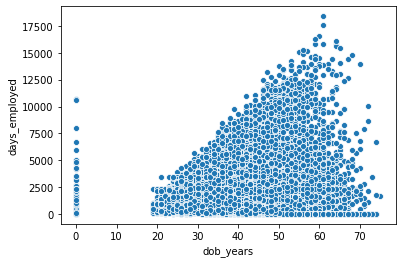

In [19]:
# Проверим работу замены:
display(df.tail(8))
sb.scatterplot(data=df, x='dob_years', y='days_employed')

In [20]:
#Проверим диапазон значений для ежемесячного дохода:
print_edges(df['total_income'], 'Ежемесячный доход')

--------------------------------------------------
Ежемесячный доход:
Максимальное значение: 2265604.028722744
Минимальное значение: 20667.26379327158
--------------------------------------------------


Диапазон значений ежемесячного дохода приемлим.

Заменим ежемесячный доход на целочисленные значения:

In [21]:
df['total_income'] = df['total_income'].astype(int)
# Просмотрим несколько измененных значений
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


**Вывод**

При заполнении таблицы данных имеются ошибки в работе програмного беспечения в работе с колонкой трудового стажа.

Ошибки значений трудового стажа исправлены.

Данные по трудовому стажу и ежемесячному доходу приведены к целочисленному типу для удобства и нагладности дальнейшего анализа.

### Обработка ошибок в значениях <a id="error_value"></a>

Для выявления ошибок (неявных дубликатов) в данных проверим столбцы, вызвавшие подозрение на этапе [ознакомления с данными](#review).

Для этого в случае с категориальными данными выведем и оценим уникальные значения по столбцу, а для количественных данных просмотрим нижнюю и верхнюю границу диапазона данных. В соответствии с результатом примем дальнейшие действия по исправлению данных.

#### Столбец 'children'

В столбце 'children' содержатся категориальные данные, поэтому проверим уникальные значения методом `value_counts()`

In [22]:
# Проверим значения столбца 'children'
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Отрицательных значений детей не может быть. Заменим отрицательные значения на положительные:

In [23]:
df['children'] = df['children'].replace(-1, 1)

Значение количества детей `20` не может быть. Вероятнее всего ошибка значения вещественного типа `2.0` слилось в  `20`. Проверим семейный статус для таких записей

In [24]:
df[df['children'] == 20]['family_status'].value_counts()

женат / замужем          49
гражданский брак         12
Не женат / не замужем     9
вдовец / вдова            4
в разводе                 2
Name: family_status, dtype: int64

Больше людей имело семейные отношения, соответственно заменим значение `20` на `2`

In [25]:
df['children'] = df['children'].replace(20, 2)
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

#### Столбец 'dob_years'

В столбце 'dob_years' содержатся количественные данные данные, поэтому проверим границы диапазона методами `min()` и `max()`

In [26]:
# Проверим диапазон значений столбца 'dob_years'
print_edges(df['dob_years'], 'Возраст клиента')

--------------------------------------------------
Возраст клиента:
Максимальное значение: 75
Минимальное значение: 0
--------------------------------------------------


Верхняя граница возраста реальная, нижняя нет. Проверим несколько минимальных значений возраста:

In [27]:
df.groupby('dob_years')['dob_years'].count().head()

dob_years
0     101
19     14
20     51
21    111
22    183
Name: dob_years, dtype: int64

Минимальный ненулевой возраст - `19 лет` вполне реальный.

Значение возраста `0` является неявным пропуском.

Заменим неявные пропуси на средние значения возраста

In [28]:
df['dob_years'] = df['dob_years'].replace(0, int(df['dob_years'].mean()))
df.groupby('dob_years')['dob_years'].count().head()

dob_years
19     14
20     51
21    111
22    183
23    254
Name: dob_years, dtype: int64

#### Столбец 'education'

В столбце 'education' содержатся категориальные данные, но проверки уникальных значений методом `value_counts()` не достаточно. На этапе [ознакомления с данными](#review) было выявлено, что в таблицу заведены столбцы наименований уровня образования, и идентификаторы уровней образования, но число уникальных значений по данным столбцам не совпадает. Соответственно нужно проверить соотношение дубликатов наименований уровней образования с идентификаторами. Воспользуемся для этого группировкой значений и поиском уникальных идентификаторов по группам.

In [29]:
# Проверим значения столбца 'education' и соотношение со столбцом 'education_id'
df.groupby('education')['education_id'].unique().sort_values()

education
ВЫСШЕЕ                 [0]
Высшее                 [0]
высшее                 [0]
СРЕДНЕЕ                [1]
Среднее                [1]
среднее                [1]
НЕОКОНЧЕННОЕ ВЫСШЕЕ    [2]
Неоконченное высшее    [2]
неоконченное высшее    [2]
НАЧАЛЬНОЕ              [3]
Начальное              [3]
начальное              [3]
УЧЕНАЯ СТЕПЕНЬ         [4]
Ученая степень         [4]
ученая степень         [4]
Name: education_id, dtype: object

Всего 5 уровней образования, каждый соответсвует определенному `education_id`, только записанные в разном регистре. Исправим регистр:

In [30]:
df['education'] = df['education'].apply(lambda x: x.lower())
# Проверим значения столбца 'education' и соотношение со столбцом 'education_id'
df.groupby('education')['education_id'].unique().sort_values()

education
высшее                 [0]
среднее                [1]
неоконченное высшее    [2]
начальное              [3]
ученая степень         [4]
Name: education_id, dtype: object

#### Столбец 'gender'

В столбце 'gender' содержатся категориальные данные, поэтому проверим уникальные значения методом `value_counts()`.

На этапе [ознакомления с данными](#review) было выявлено, что для пола клиента 3 уникальных значения - это много.

In [31]:
# Проверим значения столбца 'gender' и исправим лишние
display(df['gender'].value_counts())
display(df[df['gender'] == 'XNA']) # индекс = 10701

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


Ошибочное значение - `XNA`, оно в одном экземпляре, его индекс - 10701

Найдем записи с такими же параметрами (возраст, уровень образования, семейное положение, тип занятости), как у ошибочного значения:

In [32]:
index_non_gender = 10701
display(df[
    (df['dob_years'] == df.loc[index_non_gender]['dob_years']) &
    (df['education_id'] == df.loc[index_non_gender]['education_id']) &
    (df['family_status_id'] == df.loc[index_non_gender]['family_status_id']) &
    (df['income_type'] == df.loc[index_non_gender]['income_type'])
          ])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5669,0,2175,24,неоконченное высшее,2,гражданский брак,1,F,компаньон,0,119537,сыграть свадьбу
5998,0,219,24,неоконченное высшее,2,гражданский брак,1,F,компаньон,0,250701,строительство жилой недвижимости
10701,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


Две записи с подобными параметрами как у неизвестного пола клиента имеют пол `F`.

Заменим неизвестный пол `XNA` на `F`:

In [33]:
df.loc[10701, 'gender'] = 'F'
df['gender'].value_counts()

F    14237
M     7288
Name: gender, dtype: int64

#### Столбец 'income_type'

В столбце 'income_type' содержатся категориальные данные, поэтому проверим уникальные значения методом `value_counts()`

In [34]:
# Проверим значения столбца ''income_type'
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Значения столбца 'income_type' не требуют правки.

**Вывод**

В данных встречаются ошибки заполнения и пропуски.

Неверные значения выявленные на этапе [обзора данных](#review) исправлены.

### Обработка дубликатов <a id="duplicate"></a>

Для поиска дубликатов используем метод duplicated(), для удаления дубликатов - drop_duplicates(). Данные методы могут определить и удалить абсолютно идентичные записи.

In [35]:
# Определим количество явных дубликатов и удалим явные дубликаты:
print(df.duplicated().sum())
df[df.duplicated()].head(10)


71


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,2326,41,среднее,1,женат / замужем,0,F,сотрудник,0,161380,покупка жилья для семьи
3290,0,0,58,среднее,1,гражданский брак,1,F,пенсионер,0,137127,сыграть свадьбу
4182,1,2326,34,высшее,0,гражданский брак,1,F,сотрудник,0,161380,свадьба
4851,0,0,60,среднее,1,гражданский брак,1,F,пенсионер,0,137127,свадьба
5557,0,0,58,среднее,1,гражданский брак,1,F,пенсионер,0,137127,сыграть свадьбу
6312,0,2326,30,среднее,1,женат / замужем,0,M,сотрудник,0,161380,строительство жилой недвижимости
7808,0,0,57,среднее,1,гражданский брак,1,F,пенсионер,0,137127,на проведение свадьбы
7921,0,0,64,высшее,0,гражданский брак,1,F,пенсионер,0,137127,на проведение свадьбы
7938,0,0,71,среднее,1,гражданский брак,1,F,пенсионер,0,137127,на проведение свадьбы
8583,0,0,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,137127,дополнительное образование


In [36]:
# Удалим явные дубликаты:
df = df.drop_duplicates().reset_index(drop=True)
# Проверим на наличие дубликатов:
print(df.duplicated().sum())

0


**Вывод**

Такое большое число дубликатов возникло в результате пропусков значений для стажа и ежемесячного дохода.

Возможно это не дубликаты, а совпадения. Но в текущем исследовании примем эти записи как дубликаты, очистим их и в дальнейшем заполним пропуски по уникальным записям.

### Лемматизация <a id="lemmas"></a>

В данных о целях кредита повторяются однотипные цели, сформулированные разными фразами. Это может быть вследствие нестрого значения для данного поля при заполнении данных выбора (например, не создан строгий выпалающий список). Скорее всего операто заполняет эти данные в произвольной форме.

Вследствие повторения отдельных ключевых слов в разных целях кредитования можно выделить несколько основных типов целей кредита.

Для этого можно воспользоваться готовой функцией лемматизации - приведение слова к его словарной форме (лемме).

Подсчитав количество лемм можно определить частоту использования ключевых слов и тем самым выделить основные типы целей кредита.

In [37]:
try:
    m = Mystem()
except:
    print('Ошибка создания экземпляра Mystem() (проверьте подключение модуля pymystem3)')
purposes = df['purpose'].unique()
lemmas = m.lemmatize(' '.join(purposes))
#print(purposes)
print(Counter(lemmas))

Counter({' ': 96, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


**Вывод**

Наиболее частые слова в целях кредита:
- покупка
- недвижимость
- автомобиль
- образование
- жилье
- опреция
- свадьба
(предлоги, местоимения и т.п. не расспатриваем)

Слова "покупка" и "операция" - общесвязующие и не являются отдельным типом, могут использоваться в описании разных типов целей.

Для категоризации данных оставим 5 ключевых слов:
- недвижимость
- автомобиль
- образование
- жилье
- свадьба

Несмотря на схожесть слов "недвижимость" и "жилье", они все же могут обозначать разные цели. Поэтому оставим оба слова как самостоятельный тип целей кредита. Для цели, содержащей леммы "недвижимсоть" и "жилой", переназначим ее как "жилье".

### Категоризация данных <a id="categories"></a>

#### Добавление категорий

Выделим 3 уровня категорий из уровня дохода. Используем для этого равные доли процентилей.

Выделим 5 уровней категорий целей кредита. Используем для этого найденные леммы.

In [38]:
# ------------------------------------------------------------
# Добавим категории уровня дохода
# ФУНКЦИЯ присвоения категорий по уровню дохода:
level1 = df['total_income'].quantile(0.33)
level2 = df['total_income'].quantile(0.67)
def to_category_total_income(value):
    if value >= level2:
        return 'высокий'
    elif value <= level1:
        return 'низкий'
    else:
        return 'средний'

# Добавим категории целей кредита
df['total_income_category'] = df['total_income'].apply(to_category_total_income)

# Проверим все ли цели кредита получили категорию
df['total_income_category'].value_counts()

средний    7294
низкий     7080
высокий    7080
Name: total_income_category, dtype: int64

In [39]:
# ------------------------------------------------------------
# Добавим категории целей кредита
# Выделим основные категории целей кредита из полученных лемм:
categories_purpose = ['недвижимость', 'автомобиль', 'образование', 'жилье', 'свадьба', 'жилой']

# ФУНКЦИЯ присвоения категорий по уровню дохода:
def to_category_purpose(value):
    try:
        lemmas = m.lemmatize(value)
    except:
        print('Ошибка лемматизации. (Перемнная m должна быть экземпляром класса Mystem() !)')
        return ''
    temp = []
    for category in categories_purpose:
        if category in lemmas:
            temp.append(category)
    return '/'.join(temp)

# Добавим категории целей кредита
df['purpose_category'] = df['purpose'].apply(to_category_purpose)

# Переназначим "недвижимость/жилой" в "жилье" для выделения отдельно "недвижимости" и "жилой недвижимости" (разные категории):
df.loc[df['purpose_category'] == 'недвижимость/жилой', 'purpose_category'] = 'жилье'

# Проверим все ли цели кредита получили категорию
df['purpose_category'].value_counts()

жилье           5690
недвижимость    5121
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose_category, dtype: int64

#### СЛОВАРИ КАТЕГОРИЙ:

Сотавим наглядное представление всех категрий данных.

В список словарей возьмем категориальные данные, т.е. переменные из *ограниченного набора*, описывающие категории с *отличительными признаками* и выделяющие *большие группы* наблюдений.

In [40]:
horizon = 60
# Выделим категории по количеству детей
print('-'*horizon)
print('Категории по КОЛИЧЕСТВУ ДЕТЕЙ:')
display(df['children'].drop_duplicates().reset_index(drop=True))

# Выделим категории уровня образования в отдельный словарь
print('-'*horizon)
print('Категории УРОВНЯ ОБРАЗОВАНИЯ:')
education_log = df[['education', 'education_id']].drop_duplicates().reset_index(drop=True)
display(education_log)

# Выделим категории семейног остатуса в отдельный словарь
print('-'*horizon)
print('Категории СЕМЕЙНОГ ОСТАТУСА:')
family_status_log = df[['family_status', 'family_status_id']].drop_duplicates().reset_index(drop=True)
display(family_status_log)

# Выделим категории типа занятости
print('-'*horizon)
print('Категории по ТИПУ ЗАНЯТОСТИ:')
display(df['income_type'].drop_duplicates().reset_index(drop=True))

# Выделим категории по ежемесячному доходу
print('-'*horizon)
print('Категории по ЕЖЕМЕСЧЯЧНОМУ ДОХОДУ:')
total_income_log = df.groupby('total_income_category').agg({'total_income':['min','max']}).sort_values(by=('total_income','min'))
display(total_income_log)

# Выделим категории целей кредита
print('-'*horizon)
print('Категории ЦЕЛЕЙ КРЕДИТА:')
display(df['purpose_category'].drop_duplicates().reset_index(drop=True))

------------------------------------------------------------
Категории по КОЛИЧЕСТВУ ДЕТЕЙ:


0    1
1    0
2    3
3    2
4    4
5    5
Name: children, dtype: int64

------------------------------------------------------------
Категории УРОВНЯ ОБРАЗОВАНИЯ:


,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


------------------------------------------------------------
Категории СЕМЕЙНОГ ОСТАТУСА:


,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


------------------------------------------------------------
Категории по ТИПУ ЗАНЯТОСТИ:


0          сотрудник
1          пенсионер
2          компаньон
3        госслужащий
4        безработный
5    предприниматель
6            студент
7          в декрете
Name: income_type, dtype: object

------------------------------------------------------------
Категории по ЕЖЕМЕСЧЯЧНОМУ ДОХОДУ:


total_income         
                               min      max
total_income_category                      
низкий                       20667   122162
средний                     122164   177855
высокий                     177868  2265604

------------------------------------------------------------
Категории ЦЕЛЕЙ КРЕДИТА:


0           жилье
1      автомобиль
2     образование
3         свадьба
4    недвижимость
Name: purpose_category, dtype: object

**Вывод**

В данных можно выделить несколько категорий.

По персональной информации:
- 6 категрий по количеству детей
- 5 категорий семейног отсатуса

По профессиональной информации:
- 5 категрий уровня образования
- 8 категорий типа занятости
- 3 категории дохода

По информации о кредите:
- 5 категорий целей кредитования


## Шаг 3. Ответы на вопросы

Расситаем средний уровень задолженности для всех наблюдений для сравнительной характеристики:

In [41]:
print('Общий средний уровень задолженности: {0:.4f} ({0:.2%})'.format(df['debt'].mean()))

Общий средний уровень задолженности: 0.0812 (8.12%)


***

- __Зависимость между наличием детей и возвратом кредита в срок__

Построим таблицу и график доли задолженности по всем категориям количества детей.

debt       
              mean  count
children                 
0         0.075438  14091
1         0.091658   4855
2         0.094925   2128
3         0.081818    330
4         0.097561     41
5         0.000000      9

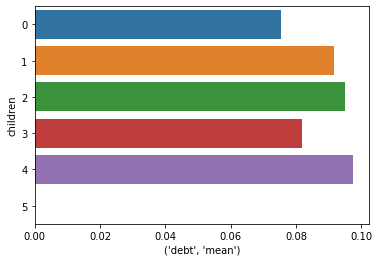

In [42]:
debt_vs_children = df.groupby('children').agg({'debt':['mean','count']})
display(debt_vs_children)
sb.barplot(x=debt_vs_children[('debt', 'mean')], y=debt_vs_children.index, orient='h')

**Вывод**

Среди наибольшего числа наблюдений (от 0 до 2 детей число наблюдений - 21074) наблюдается зависимость роста задолженности с увеличением количества детей.

По случаю с 5-ю детьми недостаточно наблюдений (судя по среднему уровню задолженности с 12-го наблюдения должна появится задолженность)

Случай с 3-мя детьми выбивается из данной зависимости, но соовтетсвут среднему уровню задолженности.

***

- __Зависимость между семейным положением и возвратом кредита в срок__

Построим таблицу и график доли задолженности по всем категориям семейного статуса.

debt       
                           mean  count
family_status                         
вдовец / вдова         0.065693    959
в разводе              0.071130   1195
женат / замужем        0.075452  12339
гражданский брак       0.093471   4151
Не женат / не замужем  0.097509   2810

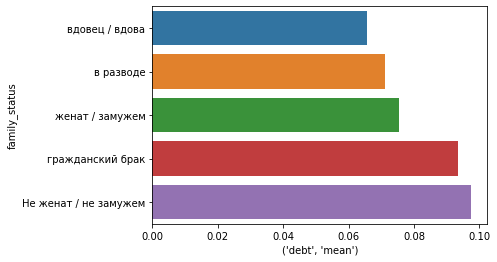

In [43]:
debt_vs_family_status = df.groupby('family_status').agg({'debt':['mean','count']}).sort_values(('debt', 'mean'))
display(debt_vs_family_status)
sb.barplot(x=debt_vs_family_status[('debt', 'mean')], y=debt_vs_family_status.index)

**Вывод**

Между семейным положением и сроком возвврата кредита в срок имеется зависимость.

У свободных людей и состоящих в "свободных" взаимоотношениях (гражданский брак) вероятность задолженности выше.

А у одиноких людей после прекратившихся взаимоотношений вероятность задолженности ниже.

У людей в официальном браке уровень задолженности ниже общего среднего.

Можно сделать вывод, что люди, прошедшие через официальный брак, наиболее ответственны.

***

- __Зависимость между уровнем дохода и возвратом кредита в срок__

Построим таблицу и график доли задолженности по всем категориям дохода.

debt      
                           mean count
total_income_category                
высокий                0.073588  7080
низкий                 0.081638  7080
средний                0.088018  7294

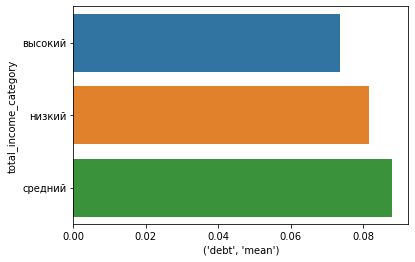

In [44]:
debt_vs_total_income = df.groupby('total_income_category').agg({'debt':['mean','count']}).sort_values(('debt', 'mean'))
display(debt_vs_total_income)
sb.barplot(x=debt_vs_total_income[('debt', 'mean')], y=debt_vs_total_income.index)

**Вывод**

Зависимость между уровнем дохода и возвратом кредита в срок - прямая.

Чем выше уровень дохода, тем меньше вероятность возникновения задолженности.

***

- __Влияние разных целей кредита на его возврат в срок__

Построим таблицу и график доли задолженности по всем категориям целей кредита.

debt      
                      mean count
purpose_category                
жилье             0.069772  5690
недвижимость      0.075181  5121
свадьба           0.080034  2324
образование       0.092200  4013
автомобиль        0.093590  4306

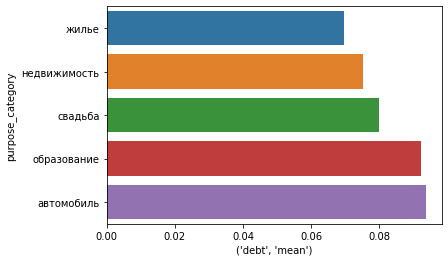

In [45]:
debt_vs_purpose = df.groupby('purpose_category').agg({'debt':['mean','count']}).sort_values(('debt', 'mean'))
display(debt_vs_purpose)
sb.barplot(x=debt_vs_purpose[('debt', 'mean')], y=debt_vs_purpose.index)

**Вывод**

Если целью кредита является недвижимость (жилая или иная), то вероятность просрочить платеж ниже.

При менее значительных покупках (образование, автомобиль) вероятность упустить срок возврата выше.

Можно сделать вывод, что к наиболее дорогостоящим покупкам подход более ответственный.
В случае с автомобилем возможно провести дополнительное исследование уровня задолженности в зависимости от суммы кредита на автомобиль, поскольку цены на автомобили могут быть значительно разными.

***

## Шаг 4. Общий вывод

Был проведен анализ и построены зависимости факта погашения кредита в срок от таких факторов: наличие детей, семейное положение, уровень дохода, цель кредита.

Общий вывод по выявленным зависимостям можно сдеалать такой:

Более ответственные и осторожные люди (которые ответственнее подходят к браку, осторожнее заводят детей, обдумывают крупные покупки, берут кредит при соответсвующем уровне дохода) чаще возвращают кредит вовремя.